In [50]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [51]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


# Context

Каждая строка – пассажир Титаника(?). В качестве признаков: выжил ли пассажир (1 – выжил, 0 – нет); имя пассажира; пол; возраст; количество братьев и сестёр с ним; количество родителей с ним; номер билета; цена билета; номер каюты;  

# Data quality assessment

In [52]:
print(f'Количество строк – {train_data.shape[0]}, количество столбцов – {train_data.shape[1]}') # размерность таблицы

Количество строк – 100000, количество столбцов – 12


In [53]:
train_data.isnull().sum() # количество пропущенных значений в каждом столбце

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             3292
SibSp              0
Parch              0
Ticket          4623
Fare             134
Cabin          67866
Embarked         250
dtype: int64

In [54]:
train_data.nunique() # количество уникальных значений по каждому признаку

PassengerId    100000
Survived            2
Pclass              3
Name            92144
Sex                 2
Age               173
SibSp               7
Parch               8
Ticket          75331
Fare            15935
Cabin           26992
Embarked            3
dtype: int64

Используя данные, полученные в предыдущей ячейке, можно сделать вывод, что категориальными признаками являются: Survived, Pclass, Sex, Embarked. Все остальные признаки – количественные.

In [55]:
sns.set_style('dark')

## 1. Survive 

Этот признак показывает выжил пассажир или погиб.

In [56]:
len(train_data[train_data.Survived == 0]) / len(train_data.Survived) * 100

57.226

57.2% пассажиров погибло.

## 2. Pclass

Признак обозначает класс каюты, в которой проживал пассажир

<AxesSubplot:ylabel='Pclass'>

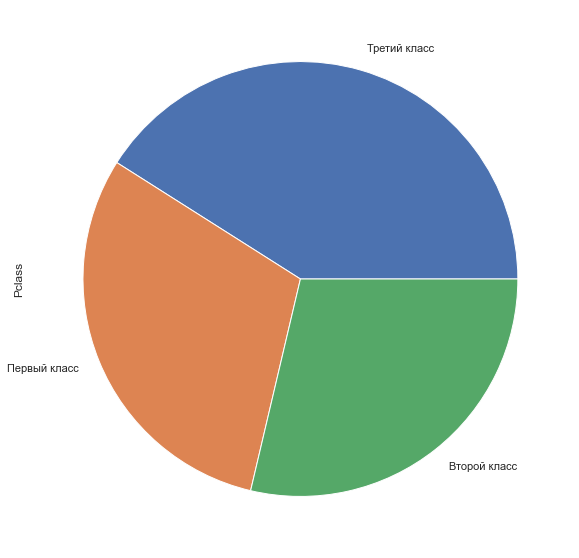

In [57]:
train_data.Pclass.value_counts().plot.pie(labels = ['Третий класс', 'Первый класс', 'Второй класс'], figsize =(10, 10))

Как мы видим, в 3 классе проживало наибольшее количество пассажиров.

<AxesSubplot:>

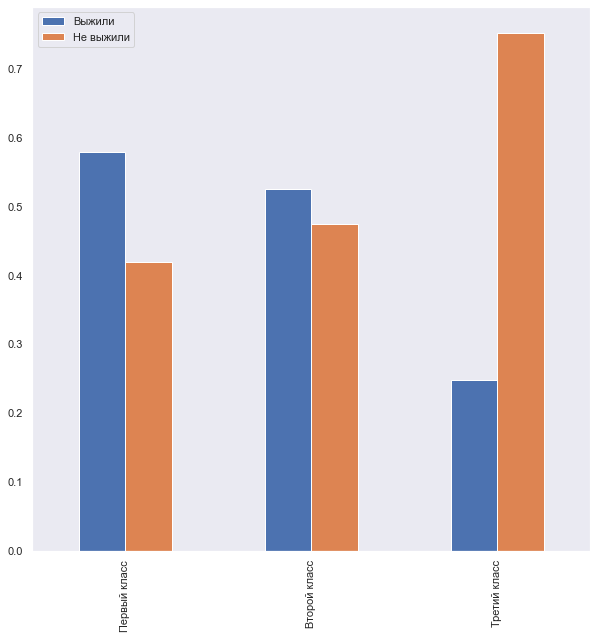

In [58]:
first = (train_data[train_data.Pclass == 1].Survived == 1).value_counts()[1]/len(train_data[train_data.Pclass == 1]) 
second = (train_data[train_data.Pclass == 2].Survived == 1).value_counts()[1]/len(train_data[train_data.Pclass == 2]) 
third = (train_data[train_data.Pclass == 3].Survived == 1).value_counts()[1]/len(train_data[train_data.Pclass == 3]) 
df = pd.DataFrame({ 'Выжили' : {'Первый класс': first, 'Второй класс': second, 'Третий класс': third},  
     'Не выжили' : {'Первый класс': 1 - first, 'Второй класс': 1 - second, 'Третий класс': 1 - third}})
df.plot.bar(figsize = (10, 10))

## 3. Name

In [59]:
unique_names = train_data.Name.nunique()
unique_names / train_data.Name.size * 100

92.144

Доля уникальных имён – 92.1%.

## 4. Sex

<AxesSubplot:xlabel='Sex'>

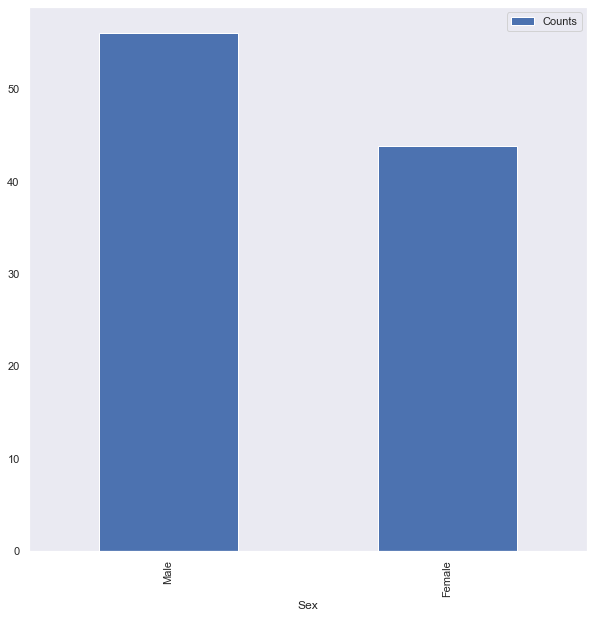

In [60]:
sex = pd.DataFrame({'Sex' : ['Male', 'Female'], 'Counts':[(len(train_data[train_data.Sex == 'male']) / len(train_data.Sex) * 100), (len(train_data[train_data.Sex == 'female']) / len(train_data.Sex) * 100)]})
sex.plot.bar(x = 'Sex', y = 'Counts', figsize = (10, 10))

<AxesSubplot:>

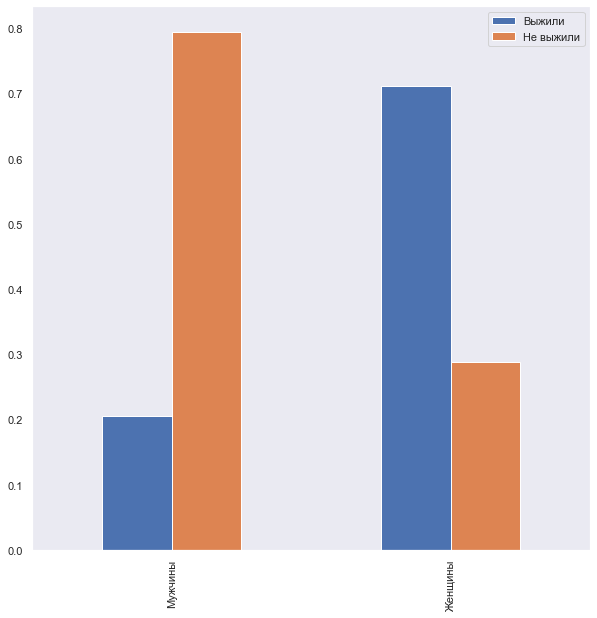

In [61]:
male = (train_data[train_data.Sex == 'male'].Survived == 1).value_counts()[1]/len(train_data[train_data.Sex == 'male']) 
female = (train_data[train_data.Sex == 'female'].Survived == 1).value_counts()[1]/len(train_data[train_data.Sex == 'female']) 
sex_surv = pd.DataFrame({ 'Выжили' : {'Мужчины': male, 'Женщины': female},  
     'Не выжили' : {'Мужчины': 1 - male, 'Женщины': 1 - female}})
sex_surv.plot.bar(figsize = (10, 10))

Среди женщин наибольший процент выживших.

## 5. Age

In [62]:
train_data.Age.describe()

count    96708.000000
mean        38.355472
std         18.313556
min          0.080000
25%         25.000000
50%         39.000000
75%         53.000000
max         87.000000
Name: Age, dtype: float64

Как мы видим, средний возраст на лайнере составил 38.4 года. Самому младшему пассажиру было чуть менее года, самому старшему – 87 лет. 

In [63]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

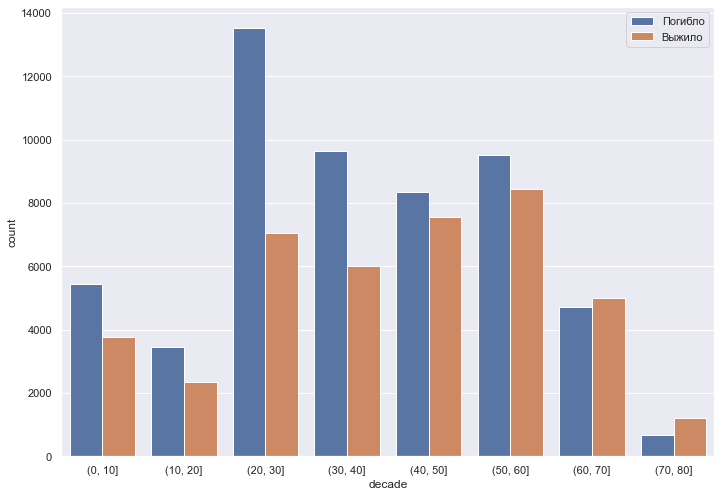

In [64]:
train_data['decade'] = pd.cut(train_data.Age, [0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.countplot(x = 'decade', hue = 'Survived', data = train_data).legend(labels = ['Погибло', 'Выжило'])

C:\Users\Danil Badgutdinov\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

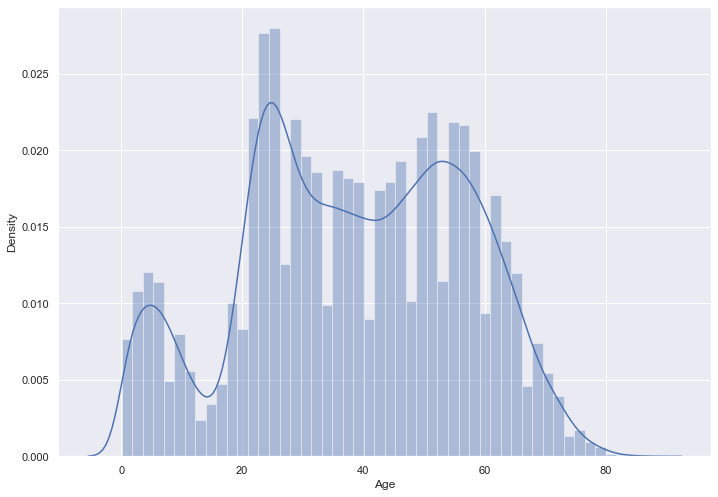

In [65]:
sns.distplot(train_data.Age.dropna())

## 6. SibSp


In [66]:
train_data.SibSp.describe()

count    100000.000000
mean          0.397690
std           0.862566
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           8.000000
Name: SibSp, dtype: float64

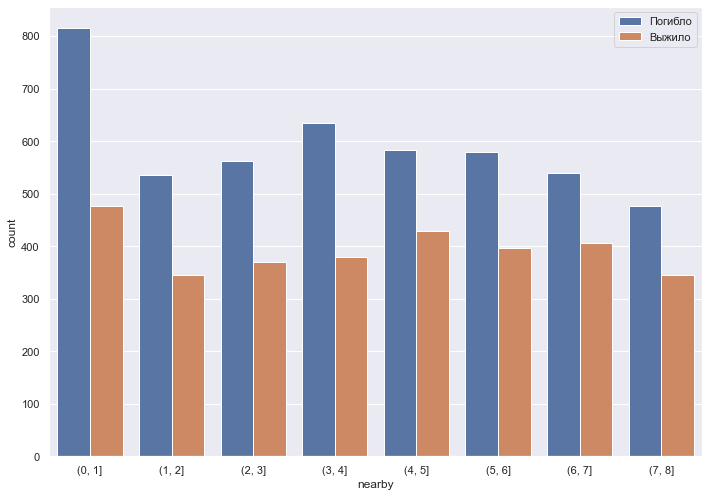

In [67]:
train_data['nearby'] = pd.cut(train_data.Age, [0, 1, 2, 3, 4, 5, 6, 7, 8])
sns.countplot(x = 'nearby', hue = 'Survived', data = train_data).legend(labels = ['Погибло', 'Выжило'])

## 7. Parch

In [68]:
train_data.Parch.describe()

count    100000.000000
mean          0.454560
std           0.950076
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           9.000000
Name: Parch, dtype: float64

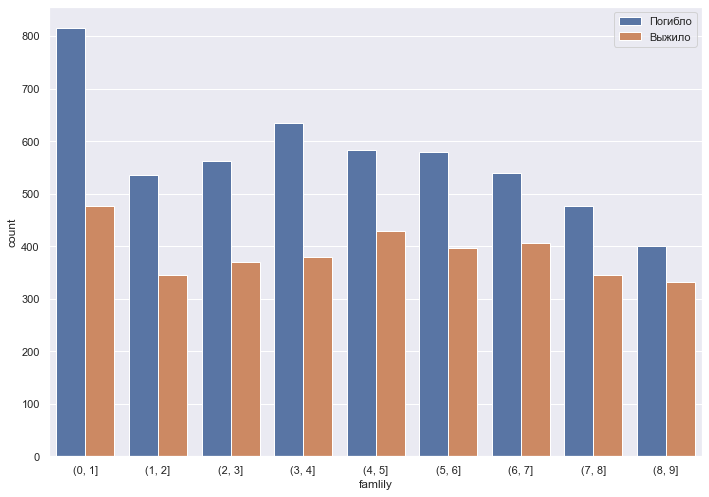

In [69]:
train_data['famlily'] = pd.cut(train_data.Age, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
sns.countplot(x = 'famlily', hue = 'Survived', data = train_data).legend(labels = ['Погибло', 'Выжило'])

## 8. Ticket

Пропустим этот признак, так как ничего интересного из него вытащить нельзя.

## 9. Fare


In [70]:
train_data.Fare.describe()

count    99866.00000
mean        43.92933
std         69.58882
min          0.68000
25%         10.04000
50%         24.46000
75%         33.50000
max        744.66000
Name: Fare, dtype: float64

<AxesSubplot:ylabel='Fare'>

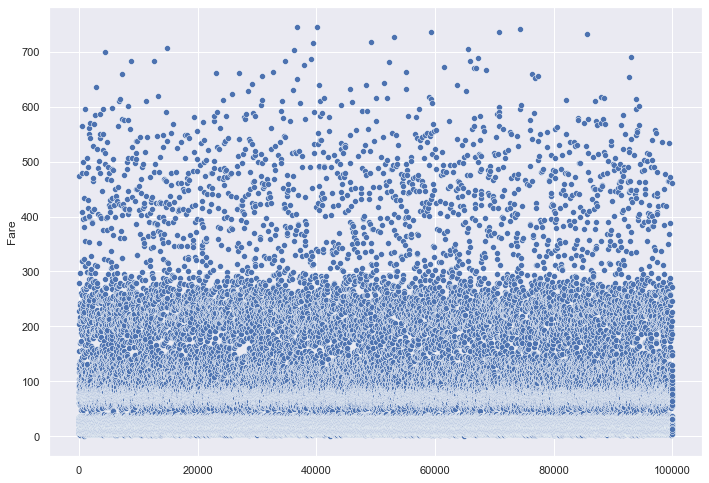

In [71]:
sns.scatterplot(data = train_data.Fare)

In [72]:
train_data['price tag'] = pd.cut(train_data['Fare'], bins=[0, 10.04, 24.46, 33.5], labels=['Low', 'Mid', 'High'])

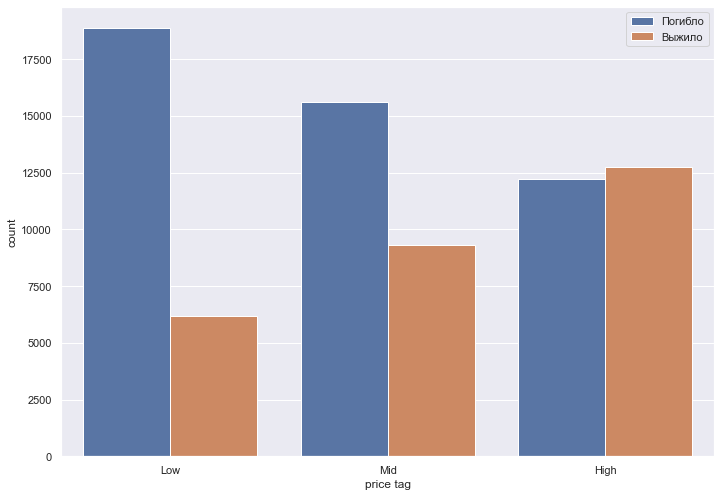

In [73]:
sns.countplot(x = 'price tag', hue = 'Survived', data = train_data).legend(labels = ['Погибло', 'Выжило'])

## 10. Cabin

Около 2/3 значений в столбце пропущено.

## 11. Embarked

In [74]:
train_data.Embarked.describe()

count     99750
unique        3
top           S
freq      72139
Name: Embarked, dtype: object

In [75]:
pd.unique(train_data.Embarked)

array(['S', 'C', 'Q', nan], dtype=object)

<AxesSubplot:>

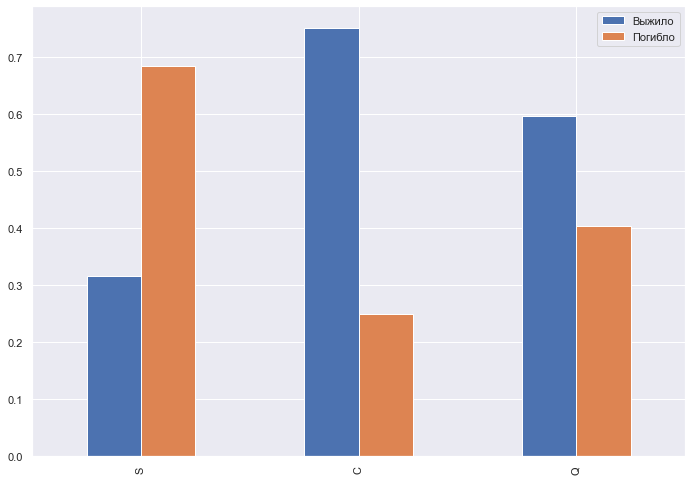

In [76]:
S = (train_data[train_data.Embarked == 'S'].Survived == 1).value_counts()[1]/len(train_data[train_data.Embarked == 'S']) 
C = (train_data[train_data.Embarked == 'C'].Survived == 1).value_counts()[1]/len(train_data[train_data.Embarked == 'C']) 
Q = (train_data[train_data.Embarked == 'Q'].Survived == 1).value_counts()[1]/len(train_data[train_data.Embarked == 'Q'])
embarked_df = pd.DataFrame({ 'Выжило' : {'S': S, 'C': C, 'Q': Q},  
     'Погибло' : {'S': 1 - S, 'C': 1 - C, 'Q': 1 - Q}})
embarked_df.plot.bar() 

# Summary

## 1. Survived

Из таблицы данных можно сделать вывод о том, что около 60% пассажиров погибло.

## 2. Pclass

Из второго графика следует, что наибольший шанс выжить был у пассажиров в первом классе. Наименьший – у пассажиров в третьем классе.

## 3. Names

Доля уникальных имён составляет 92.1 %.

## 4. Sex

Из графиков следует, что пассажиров-мужчин на лайнере было больше, при этом подавляющее количество мужчин погибло, а подавляющее количество женщин – выжило.

## 5. Age

Количество выживших преобладает над количеством погибших только в группах от 60 до 70 и от 70 до 80. При этом наибольшее отношение погибших к выжившим в группе людей от 20 до 30 лет.

## 6. SibSp

Наиболее уязвимыми оказались люди, которые путешествовали в одиночку.

## 7. Parch

Как и в предыдущем случае, наименьший шанс выжить у тех, кто путешествовал один. Наибольший же – у тех, кто был с 9 родственниками.

## 8. Ticket

—–

## 9. Fare

По первому графику видно, что преобладает количество билетов до 300$, по второму графику видно, что тем дороже билет, тем больше шансов выжить.

## 10. Cabin


——

## 11. 	Embarked	

Наибольший шанс выжить у тех, пассажиров, чьим признаком в столбце Embarked было С, наименьший – у тех, у кого было S.